<a href="https://colab.research.google.com/github/mojieve/OnlineShopAnalytics/blob/main/OnlineRetailStore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn import preprocessing

## Mounting Google drive and reading the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/IKEA Assessment/CustomerData.csv', sep=";")

df.head(10)

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0.0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1.0,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1.0,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1.0,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1.0,8,NaN,NaN,7871


## Exploratory Data Analysis (EDA)

### Data Cleaning

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CustomerID     537577 non-null  int64  
 1   ItemID         537577 non-null  object 
 2   Sex            537577 non-null  object 
 3   Age            537577 non-null  object 
 4   Profession     537577 non-null  int64  
 5   CityType       537577 non-null  object 
 6   YearsInCity    537577 non-null  object 
 7   HaveChildren   517407 non-null  float64
 8   ItemCategory1  537577 non-null  int64  
 9   ItemCategory2  370591 non-null  float64
 10  ItemCategory3  164278 non-null  float64
 11  Amount         537577 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 49.2+ MB


In [ ]:
# Finding out about unique items and categories 

print('No of Unique Customers:',df.CustomerID.nunique())
print('No of Unique Items:',df.ItemID.nunique())
print(df.Sex.nunique(),' categories in Sex: ',df.Sex.unique())
print(df.Age.nunique(),' categories in Age: ',df.Age.unique())
print(df.Profession.nunique(),' categories in Profession: ',df.Profession.unique())
print(df.CityType.nunique(),' categories in CityType: ',df.CityType.unique())
print(df.YearsInCity.nunique(),' categories in YearsInCity: ',df.YearsInCity.unique())
print(df.HaveChildren.nunique(),' categories in HaveChildren: ',df.HaveChildren.unique())

No of Unique Customers: 5891
No of Unique Items: 3623
2  categories in Sex:  ['F' 'M']
7  categories in Age:  ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
21  categories in Profession:  [10 16 15  7 20  9  1 12 17  0  3  4 11  8 19  2 18  5 14 13  6]
3  categories in CityType:  ['A' 'C' 'B']
5  categories in YearsInCity:  ['2' '4+' '3' '1' '0']
2  categories in HaveChildren:  [ 0.  1. nan]


In [ ]:
# Check for duplicate values

sum(df.duplicated())

0

In [ ]:
# Checking missing values

df.isnull().sum()

CustomerID            0
ItemID                0
Sex                   0
Age                   0
Profession            0
CityType              0
YearsInCity           0
HaveChildren      20170
ItemCategory1         0
ItemCategory2    166986
ItemCategory3    373299
Amount                0
dtype: int64

##### **Here we can see that, in all interactions, the ItemCategory1 has been viewed, but in 166986 interactions, ItemCategory2 hasn’t been viewed, and for ItemCategory3, this number increases to 373299. 

In [ ]:
df1 = df.copy()

In [ ]:
# Putting 0 for missing values in ItemCategory2 and ItemCategory3

cols = ["ItemCategory2","ItemCategory3"]
df1[cols] = df1[cols].fillna(value = 0)

df1.isnull().sum()

CustomerID           0
ItemID               0
Sex                  0
Age                  0
Profession           0
CityType             0
YearsInCity          0
HaveChildren     20170
ItemCategory1        0
ItemCategory2        0
ItemCategory3        0
Amount               0
dtype: int64

In [ ]:
df1.head(5)

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,0.0,0.0,7969


In [ ]:
# Grouping by CustomerID

Total_Time = df1.groupby(['CustomerID']).sum().reset_index()

Total_Time.head(5)

,CustomerID,Profession,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,340,0.0,193,132.0,148.0,333481
1,1000002,1216,0.0,334,539.0,359.0,810353
2,1000003,435,0.0,93,117.0,148.0,341635
3,1000004,91,13.0,13,102.0,127.0,205987
4,1000005,2120,106.0,659,642.0,207.0,821001


In [ ]:
# Cheking a random customer

df1[df1['CustomerID'] == 1000004]

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
6,1000004,P00184942,M,46-50,7,B,2,1.0,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1.0,1,15.0,0.0,15854
8,1000004,P0097242,M,46-50,7,B,2,1.0,1,16.0,0.0,15686
39188,1000004,P00046742,M,46-50,7,B,2,1.0,1,2.0,15.0,15852
155580,1000004,P00329542,M,46-50,7,B,2,1.0,1,15.0,16.0,3849
194565,1000004,P00114942,M,46-50,7,B,2,1.0,1,15.0,16.0,19120
233733,1000004,P00025442,M,46-50,7,B,2,1.0,1,2.0,9.0,19693
272819,1000004,P00112542,M,46-50,7,B,2,1.0,1,11.0,15.0,15485
350810,1000004,P00112142,M,46-50,7,B,2,1.0,1,2.0,14.0,11765
390161,1000004,P00318742,M,46-50,7,B,2,1.0,1,8.0,0.0,15853


### Defining Segments

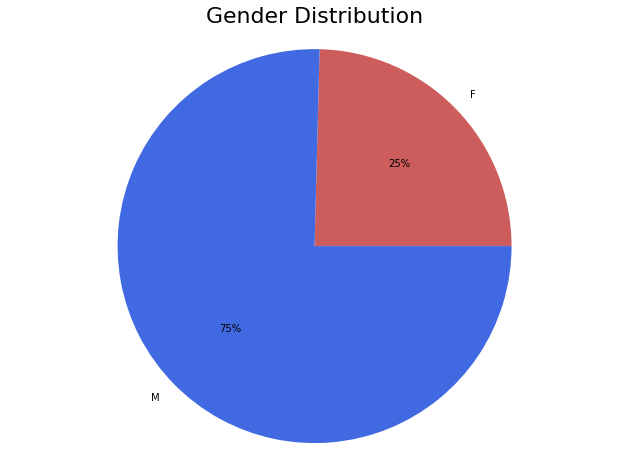

In [ ]:
# Which gender has the majority in virtual reality tour?

Gender_and_Age = df1.groupby('Age')['Sex'].count().reset_index()
Gender = df1.groupby('Sex')['Age'].count().reset_index()
Profession = df1.groupby('Profession')['Age'].count().reset_index()

plt.figure(figsize=(11,8))
plt.pie(Gender['Age'], labels=Gender['Sex'],autopct='%1.f%%', colors=['indianred','royalblue'])
plt.axis('equal')
plt.title("Gender Distribution", fontsize='22')
plt.show()

In [ ]:
Gender_and_Age

,Age,Sex
0,0-17,14707
1,18-25,97634
2,26-35,214690
3,36-45,107499
4,46-50,44526
5,51-55,37618
6,55+,20903


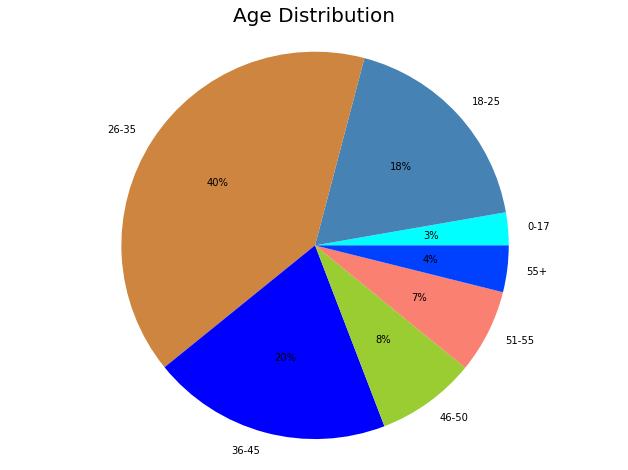

In [ ]:
# Which age group has the majority in virtual reality tour?

plt.figure(figsize=(11,8))
plt.pie(Gender_and_Age['Sex'], labels=Gender_and_Age['Age'],autopct='%1.f%%', colors=['cyan', 'steelblue','peru','blue','yellowgreen','salmon','#0040FF'])
plt.axis('equal')
plt.title("Age Distribution", fontsize='20')
plt.show()

#### As we can see in these two figures, about 75% of customers are male and their age is between 18 to 45.

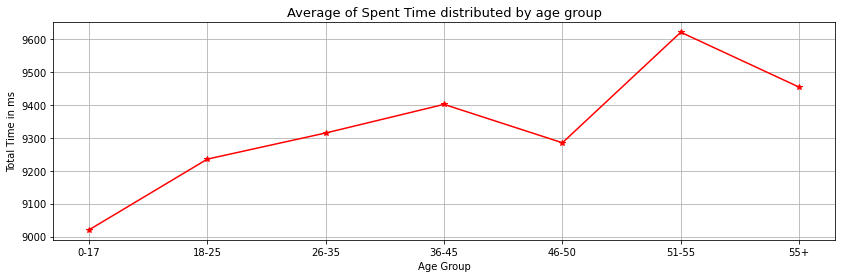

In [ ]:
# Which age group of customers has higher average time in viewing a certain item?

SpentTime_and_Age = df1.groupby('Age')['Amount'].mean().reset_index()
SpentTime_and_Age.set_index('Age', inplace=True)

plt.figure(figsize=(14,4))
plt.plot(SpentTime_and_Age.index, SpentTime_and_Age.values, color='red', marker='*')
plt.grid(True)
plt.xlabel('Age Group', fontsize=10)
plt.ylabel('Total Time in ms', fontsize=10)
plt.title('Average of Spent Time distributed by age group', fontsize=13)
plt.show()

#### We can get from this figure that the age group 51-55 has spent the highest average time viewing a certain item among all groups.

In [ ]:
SpentTime_and_Age.sort_values('Amount',ascending=False).reset_index()

,Age,Amount
0,51-55,9620.616620
1,55+,9453.898579
2,36-45,9401.478758
3,26-35,9314.588970
4,46-50,9284.872277
5,18-25,9235.197575
6,0-17,9020.126878


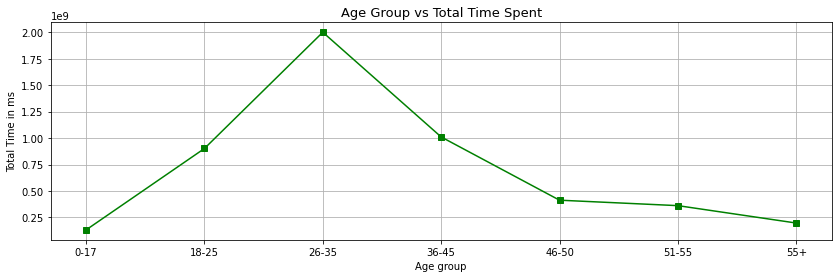

In [ ]:
# Which age group of customers has spent more time viewing a certain item?

info = df1.groupby('Age')['Amount'].sum()
info  = pd.DataFrame({'Age':info.index, 'Total Time':info.values})
plt.figure(figsize = (14,4))
plt.plot('Age','Total Time','ys-',color='green', data = info)
plt.grid(True)
plt.xlabel('Age group', fontsize=10)
plt.ylabel('Total Time in ms', fontsize=10)
plt.title('Age Group vs Total Time Spent', fontsize=13)
plt.show()

#### But in this figure, we can see that the age group 26-35 has spent more time than all other groups. As this group contains 40% of all customers, it is not surprising that they have spent more time in total.

In [ ]:
info.sort_values('Total Time',ascending=False).reset_index()

,index,Age,Total Time
0,2,26-35,1999749106
1,3,36-45,1010649565
2,1,18-25,901669280
3,4,46-50,413418223
4,5,51-55,361908356
5,6,55+,197614842
6,0,0-17,132659006


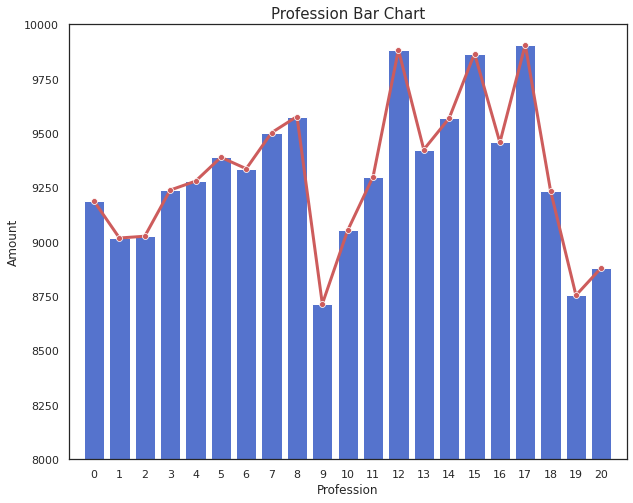

In [ ]:
# Which profession type have the highest average time of visiting certain item?

occupation = df1.groupby('Profession')['Amount'].mean().reset_index()

sns.set(style="white", rc={"lines.linewidth": 3})
fig, ax1 = plt.subplots(figsize=(10,8))

sns.barplot(x=occupation['Profession'],
            y=occupation['Amount'],
            color='royalblue',
            ax=ax1)

sns.lineplot(x=occupation['Profession'],
             y=occupation['Amount'],
             color='indianred',
             marker="o",
             ax=ax1)
plt.axis([-1,21,8000,10000])
plt.title('Profession Bar Chart', fontsize='15')
plt.show()
sns.set()

#### People with professions of 12, 15 and 17 have the highest average rate in viewing certain item.

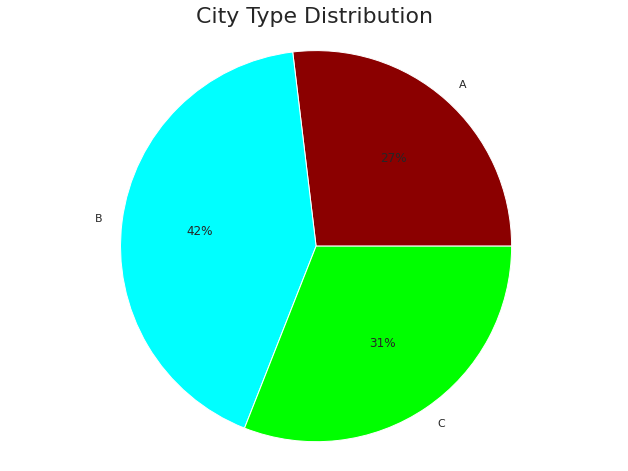

In [ ]:
# People from which city type has the majority in virtual reality tour?


City = df1.groupby('CityType')['CustomerID'].count().reset_index()

plt.figure(figsize=(11,8))
plt.pie(City['CustomerID'], labels=City['CityType'],autopct='%1.f%%', colors=['darkred','aqua', 'lime'])
plt.axis('equal')
plt.title("City Type Distribution", fontsize='22')
plt.show()


In [ ]:
# For which product customers of each age group have visited most?

popular = df1.groupby('Age')['ItemID'].apply(lambda x: x.value_counts().index[0]).reset_index()

popular

,Age,ItemID
0,0-17,P00255842
1,18-25,P00265242
2,26-35,P00265242
3,36-45,P00025442
4,46-50,P00265242
5,51-55,P00265242
6,55+,P00265242


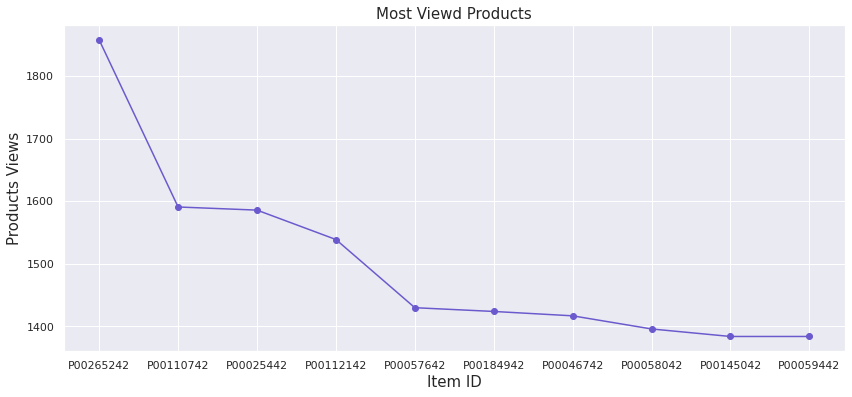

In [ ]:
# What are the 'Top 10' products customers have viewd most?

product = df1.groupby('ItemID')['Amount'].count().reset_index()
product.rename(columns={'Amount':'Count'},inplace=True)
product_sorted = product.sort_values('Count',ascending=False)

plt.figure(figsize=(14,6))
plt.plot(product_sorted['ItemID'][:10], product_sorted['Count'][:10], linestyle='-', color='slateblue', marker='o')
plt.title("Most Viewd Products", fontsize='15')
plt.xlabel('Item ID', fontsize='15')
plt.ylabel('Products Views', fontsize='15')
plt.show()

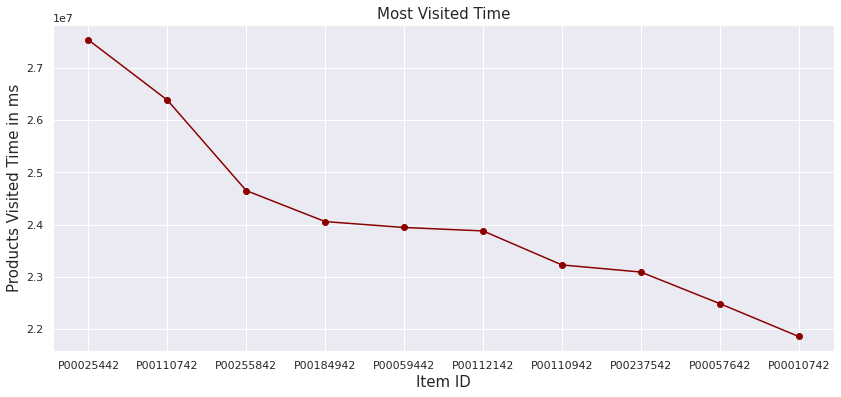

In [ ]:
# What are the 'Top 10' products customers have dedicated more time to visit?

product_visit = df1.groupby('ItemID')['Amount'].sum().reset_index()
product_visit.rename(columns={'Amount':'Count'},inplace=True)
product_visit_sorted = product_visit.sort_values('Count',ascending=False)

plt.figure(figsize=(14,6))
plt.plot(product_visit_sorted['ItemID'][:10], product_visit_sorted['Count'][:10], linestyle='-', color='darkred', marker='o')
plt.title("Most Visited Time", fontsize='15')
plt.xlabel('Item ID', fontsize='15')
plt.ylabel('Products Visited Time in ms', fontsize='15')
plt.show()

In [ ]:
# Droping null values in dataset to observe the situation of having children

df2 = df1.copy()

df2 = df2.dropna()

df2.isnull().sum()

CustomerID       0
ItemID           0
Sex              0
Age              0
Profession       0
CityType         0
YearsInCity      0
HaveChildren     0
ItemCategory1    0
ItemCategory2    0
ItemCategory3    0
Amount           0
dtype: int64

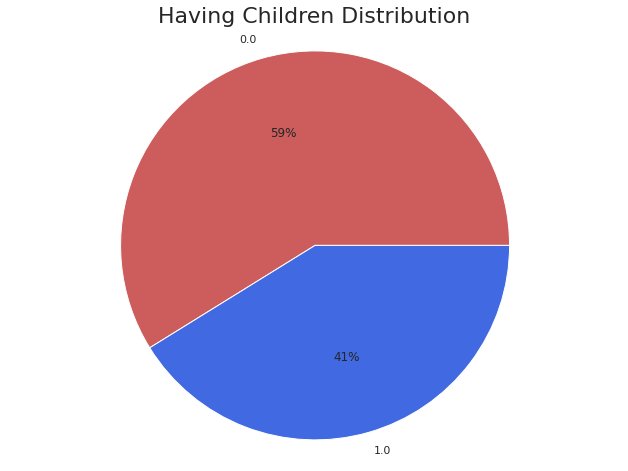

In [ ]:
# How is the situation of each age group in having children?

Children_and_Age = df2.groupby('Age')['HaveChildren'].count().reset_index()
Children = df1.groupby('HaveChildren')['Age'].count().reset_index()


plt.figure(figsize=(11,8))
plt.pie(Children['Age'], labels=Children['HaveChildren'],autopct='%1.f%%', colors=['indianred','royalblue'])
plt.axis('equal')
plt.title("Having Children Distribution", fontsize='22')
plt.show()

In [ ]:
Children_and_Age = df2[df2['HaveChildren'] == 0].groupby('Age')['CustomerID'].nunique().reset_index()

Children_and_Age.head(10)

,Age,CustomerID
0,0-17,211
1,18-25,785
2,26-35,1198
3,36-45,675
4,46-50,152
5,51-55,128
6,55+,131


In [ ]:
# Converting Age, Sex, YearsInCity  column to numerical data

label_encoder = preprocessing.LabelEncoder()
df2['Age']= label_encoder.fit_transform(df2['Age'])

label_encoder = preprocessing.LabelEncoder()
df2['Sex']= label_encoder.fit_transform(df2['Sex'])

label_encoder = preprocessing.LabelEncoder()
df2['YearsInCity']= label_encoder.fit_transform(df2['YearsInCity'])

label_encoder = preprocessing.LabelEncoder()
df2['CityType']= label_encoder.fit_transform(df2['CityType'])

In [ ]:
df2.head()

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,0,0,10,0,2,0.0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0.0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0.0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0.0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0.0,8,0.0,0.0,7969


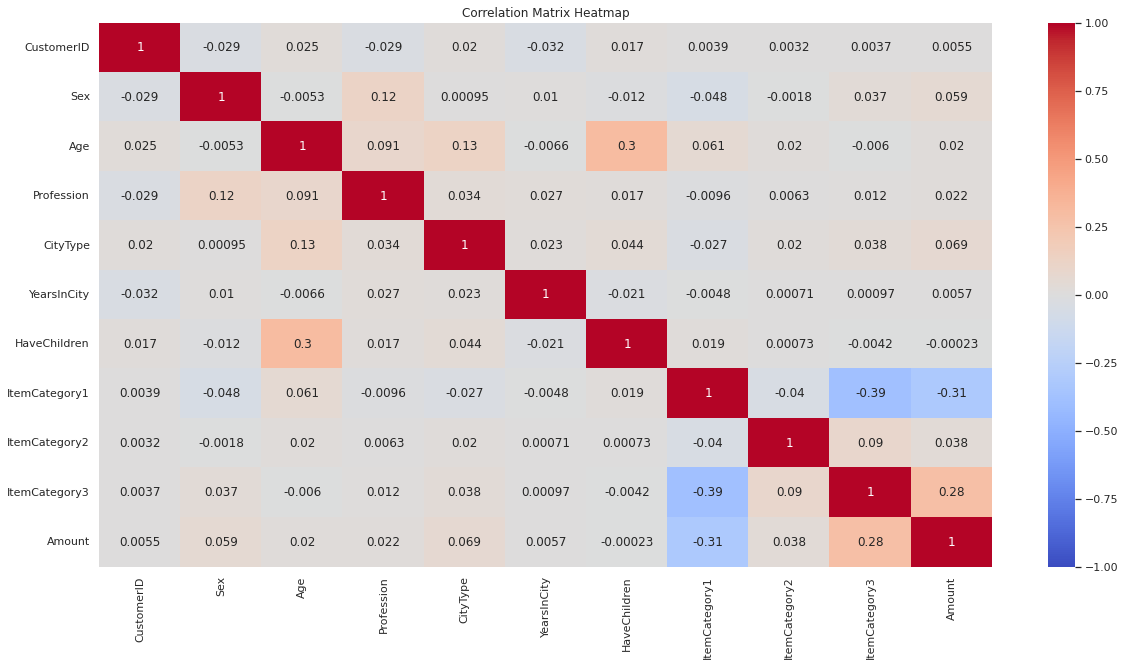

In [ ]:
# Heatmap of the data set

plt.figure(figsize=(20,10))

sns.heatmap(df2.corr(), annot=True, fmt='.2g', vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

#### From the heatmap, we can see that ‘HaveChildren’ has a week correlation with ‘Age’ and also has a very week correlation with ‘Profession’. 

In [ ]:
df3 = df1.copy()
df3 = df3.dropna()


In [ ]:
# Percentage of NOT having children for each age group

Children_and_Age = df3[df3['HaveChildren'] == 0].groupby('Age')['CustomerID'].nunique().reset_index()
Children_and_Age1 = df3.groupby('Age')['CustomerID'].nunique().reset_index()
Children_and_Age['Total Number'] = Children_and_Age1['CustomerID'].values
Children_and_Age['Having children'] = (100 - (Children_and_Age['CustomerID'] / Children_and_Age['Total Number'])*100).round(2).astype(str) + '%'
Children_and_Age['Not having children'] = ((Children_and_Age['CustomerID'] / Children_and_Age['Total Number'])*100).round(2).astype(str) + '%'
Children_and_Age.rename(columns={'CustomerID':'No. of with Children' },inplace=True) 
Children_and_Age.head(10)

,Age,No. of with Children,Total Number,Having children,Not having children
0,0-17,211,211,0.0%,100.0%
1,18-25,785,1024,23.34%,76.66%
2,26-35,1198,1981,39.53%,60.47%
3,36-45,675,1123,39.89%,60.11%
4,46-50,152,515,70.49%,29.51%
5,51-55,128,462,72.29%,27.71%
6,55+,131,363,63.91%,36.09%


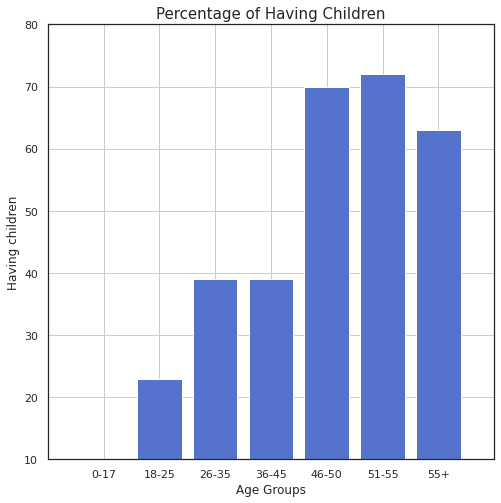

In [ ]:
Children_and_Age2 = Children_and_Age.loc[:,['Age']]
Children_and_Age2['Having children'] = (100 - (Children_and_Age['No. of with Children'] / Children_and_Age['Total Number'])*100).round(2).astype(int)
sns.set(style="white", rc={"lines.linewidth": 5})
fig, ax1 = plt.subplots(figsize=(8,8))

sns.barplot(x=Children_and_Age2['Age'],
            y=Children_and_Age2['Having children'],
            color='royalblue', 
            ax=ax1)

plt.axis([-1,7,10,80])
plt.title('Percentage of Having Children', fontsize='15')
plt.xlabel('Age Groups', fontsize='12')
plt.grid(True)
plt.show()
sns.set()

#### From this chart, we can see that people over 45 have a higher possibility than other groups to have children.

In [ ]:
df4 = df1.copy()
df4 = df4.fillna(value = 2)

In [ ]:
df4.head(100)

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
0,1000001,P00069042,F,0-17,10,A,2,0.0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0.0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0.0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0.0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0.0,8,0.0,0.0,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
95,1000019,P00251642,M,0-17,10,A,3,0.0,1,2.0,4.0,4211
96,1000019,P00244842,M,0-17,10,A,3,0.0,11,0.0,0.0,1539
97,1000021,P00220242,M,18-25,16,B,0,0.0,3,12.0,0.0,3055
98,1000022,P00351142,M,18-25,15,A,4+,0.0,1,8.0,17.0,12099


In [ ]:
df4[df4['HaveChildren'] == 2]

,CustomerID,ItemID,Sex,Age,Profession,CityType,YearsInCity,HaveChildren,ItemCategory1,ItemCategory2,ItemCategory3,Amount
56,1000015,P00334242,M,26-35,7,A,1,2.0,1,8.0,0.0,19653
57,1000015,P00247542,M,26-35,7,A,1,2.0,8,16.0,0.0,5958
58,1000015,P00338442,M,26-35,7,A,1,2.0,1,16.0,0.0,11415
59,1000015,P00275142,M,26-35,7,A,1,2.0,5,8.0,0.0,5380
60,1000015,P00333042,M,26-35,7,A,1,2.0,5,8.0,0.0,3594
...,...,...,...,...,...,...,...,...,...,...,...,...
537269,1004687,P00207842,M,36-45,14,C,0,2.0,13,16.0,0.0,962
537270,1004687,P00114342,M,36-45,14,C,0,2.0,1,8.0,17.0,19575
537545,1004733,P00144042,M,18-25,18,C,1,2.0,2,3.0,4.0,9687
537546,1004733,P00070042,M,18-25,18,C,1,2.0,1,2.0,16.0,15515


In [ ]:
# Percentage of having children for each age group

Children_and_Age4 = df4[df4['HaveChildren'] == 2].groupby('Age')['CustomerID'].nunique().reset_index()
Children_and_Age4['Having children'] = Children_and_Age['Having children'].values
Children_and_Age4.rename(columns={'CustomerID':'No. of unclear for having children' },inplace=True) 
Children_and_Age4.rename(columns={'Having children':'Possibility Having children' },inplace=True) 
Children_and_Age4.head(10)

,Age,No. of unclear for having children,Possibility Having children
0,0-17,7,0.0%
1,18-25,45,23.34%
2,26-35,72,39.53%
3,36-45,44,39.89%
4,46-50,16,70.49%
5,51-55,19,72.29%
6,55+,9,63.91%


#### Based on what we learnt, we can predict the possibility of having children among various age groups. 

In [ ]:
# Percentage of NOT having children for each proffession

Children_and_Profession = df3[df3['HaveChildren'] == 0].groupby('Profession')['CustomerID'].nunique().reset_index()
Children_and_Profession1 = df3.groupby('Profession')['CustomerID'].nunique().reset_index()
Children_and_Profession['Total Number'] = Children_and_Profession1['CustomerID'].values
Children_and_Profession['Having children'] = (100 - (Children_and_Profession['CustomerID'] / Children_and_Profession['Total Number'])*100).round(2).astype(str) + '%'
Children_and_Profession['Not having children'] = ((Children_and_Profession['CustomerID'] / Children_and_Profession['Total Number'])*100).round(2).astype(str) + '%'
Children_and_Profession.rename(columns={'CustomerID':'No. of with Children' },inplace=True) 
Children_and_Profession.sort_values(by=['Not having children'], ascending=True)

,Profession,No. of with Children,Total Number,Having children,Not having children
13,13,48,137,64.96%,35.04%
6,6,98,222,55.86%,44.14%
9,9,38,85,55.29%,44.71%
16,16,106,225,52.89%,47.11%
14,14,139,278,50.0%,50.0%
15,15,69,132,47.73%,52.27%
18,18,34,65,47.69%,52.31%
3,3,88,167,47.31%,52.69%
7,7,339,643,47.28%,52.72%
20,20,139,262,46.95%,53.05%


#### From this table, we can say that if a person has profession 13, 6 and 9, there is a good possibility that he/she has children and if a person has a profession of 4, 19 and 10, there is a low possibility that he/she has a child.